<a href="https://colab.research.google.com/github/tirtharajdash/BITS-G513_MetaLearning/blob/main/Lab_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline
1. Introduction
2. About Pytorch - To cover: Autograd (Important)
3. Simple Neural Network Training (Lab 1B)


# Introduction

A large part of the course will require understanding of how gradient based computation works. In particular, how models can be learnt through gradients. 

Apart from the initial few lectures on Deep Learning, computing gradients manually for learning will become more and more hard especially with newer modules such as Convolution, etc., being introduced.

Given the scenario, we sought the use of Differentiable Computing Frameworks. These frameworks utilize computation graphs which are essentially directed acyclic graphs representing operations and variables. 

Lets suppose we were to do the following computation as part of our learning model:

$$ p = x + y $$
$$ g = p \times z $$

A simplistic representation of the computation graph would look like:

<p align="center">
<img src="https://www.tutorialspoint.com/python_deep_learning/images/computational_graph_equation2.jpg">
</p>

Lets code this up in PyTorch!

In [57]:
# Install a visualization software
!pip install torchviz

In [52]:
import torch
from torch.autograd import Variable

x = torch.tensor([2.], requires_grad=True)
y = torch.tensor([3.], requires_grad=True)
z = torch.tensor([4.], requires_grad=True)

p = x + y
g = p * z

We can check the values of p and g just to be sure. They should be 5 and 20 respectively.

In [53]:
print(f"p: {p}")
print(f"g: {g}")

p: tensor([5.], grad_fn=<AddBackward0>)
g: tensor([20.], grad_fn=<MulBackward0>)


Lets visualize the computation graph once to be sure. We will use `torchviz` for this.

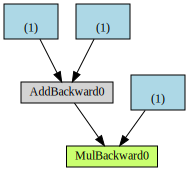

In [54]:
from torchviz import make_dot
make_dot(g)

In gradient based learning, what we've done till now is considered as a forward pass. The learning part is usually during the backward pass. So what is the backward pass?

The Backward pass is essentially where we compute gradients and update our parameters of the model based on those gradients, so that the output is a step closer to where its supposed to be. In this notebook, we will be concerned only with inspecting the value of the gradients rather than updating them.

To compute the gradients, we can call the `backward` method on a tensor. This `backward` call will compute gradients anywhere possible on the computation graph. 

In [55]:
g.backward()

The gradients can be computed simply in our case using backpropagation (chain rule):

$$ \frac{dg}{dp} = z = 4 $$

$$ \frac{dg}{dz} = p = 5 $$

$$ \frac{dg}{dx} = \frac{dg}{dp} \times \frac{dp}{dx} = z \times 1 = 4 $$

$$ \frac{dg}{dy} = \frac{dg}{dp} \times \frac{dp}{dy} = z \times 1 = 4 $$

We can verify this by checking the gradients of all these variables

In [56]:
print(f"Gradient of dg wrt dz: {z.grad}")
print(f"Gradient of dg wrt dx: {x.grad}")
print(f"Gradient of dg wrt dy: {y.grad}")

Gradient of dg wrt dz: tensor([5.])
Gradient of dg wrt dx: tensor([4.])
Gradient of dg wrt dy: tensor([4.])
